In [29]:
%matplotlib inline
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import mf2w

In [2]:
tavg_1hr_ctm = xr.open_dataset("data/GEOS.fp.asm.tavg_1hr_ctm_c0720_v72.20210401_0030.V01.nc4")
tavg3_3d_asm = xr.open_dataset("data/GEOS.fp.asm.tavg3_3d_asm_Nv.20210401_0130.V01.nc4")
c720_grid = xr.open_mfdataset([f"data/c720.tile{n}.nc" for n in range(1,7)], concat_dim='nf', combine='nested')

In [63]:
nf=4
uc, vc = mf2w.mass_fluxes_to_winds(tavg_1hr_ctm.isel(nf=nf), c720_grid.isel(nf=nf))
ua, va = mf2w.cgrid_to_agrid(uc, vc)

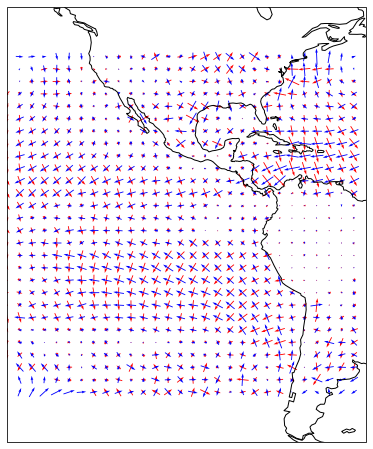

In [65]:
# derived winds (red)
x0 = c720_grid.isel(nf=nf, yc=slice(1, None, 2), xc=slice(1, None, 2)).lons.squeeze().values
x0[x0 > 180] -= 360
y0 = c720_grid.isel(nf=nf, yc=slice(1, None, 2), xc=slice(1, None, 2)).lats.squeeze().values
u0 = ua[0, -1, :, :]
v0 = va[0, -1, :, :]

# diagnostic winds (blue)
x_extent = (x0.min(), x0.max())
y_extent = (y0.min(), y0.max())
x1 = tavg3_3d_asm.lon.sel(lon=slice(*x_extent)).squeeze().values
x1[x1 > 180] -= 360
y1 = tavg3_3d_asm.lat.sel(lat=slice(*y_extent)).squeeze().values
u1 = tavg3_3d_asm.U.isel(time=0,lev=-1).sel(lat=slice(*y_extent),lon=slice(*x_extent)).squeeze().values
v1 = tavg3_3d_asm.V.isel(time=0,lev=-1).sel(lat=slice(*y_extent),lon=slice(*x_extent)).squeeze().values

plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent((*x_extent, *y_extent))
plt.quiver(x0, y0, u0, v0, transform=ccrs.PlateCarree(), regrid_shape=30, scale=300, pivot='mid', color='red')
plt.quiver(x1, y1, u1, v1, transform=ccrs.PlateCarree(), regrid_shape=30, scale=300, pivot='mid', color='blue')
